In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Applying polynomial regression on self created data

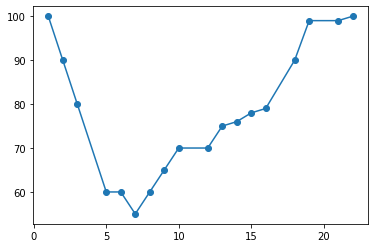

In [36]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x,y)
plt.plot(x,y)
plt.show()

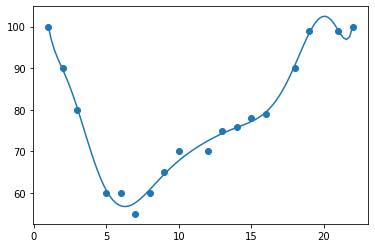

In [37]:
mymodel = np.poly1d(np.polyfit(x, y, 10))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [38]:
myline.shape

(100,)

In [39]:
arr = np.array(x).reshape(-1,1)
arr

array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [12],
       [13],
       [14],
       [15],
       [16],
       [18],
       [19],
       [21],
       [22]])

In [40]:
poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(arr)
print(X_poly)
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
  2.56000000e+02 5.12000000e+02 1.02400000e+03]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03
  6.56100000e+03 1.96830000e+04 5.90490000e+04]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04 7.81250000e+04
  3.90625000e+05 1.95312500e+06 9.76562500e+06]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05
  1.67961600e+06 1.00776960e+07 6.04661760e+07]
 [1.00000000e+00 7.00000000e+00 4.90000000e+01 3.43000000e+02
  2.40100000e+03 1.68070000e+04 1.17649000e+05 8.23543000e+05
  5.76480100e+06

LinearRegression()

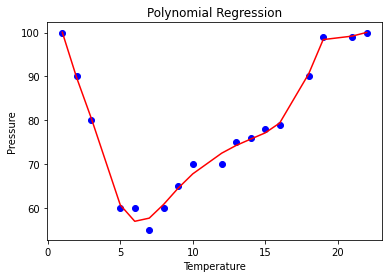

In [41]:
plt.scatter(x, y, color = 'blue') 
  
plt.plot(x, lin2.predict(poly.fit_transform(arr)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

# Applying Polynomial Regression on a Dataset

In [42]:
df = pd.read_csv(r'/Users/apple/Documents/personal/SEM6/Pattern And Anomaly Detection/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


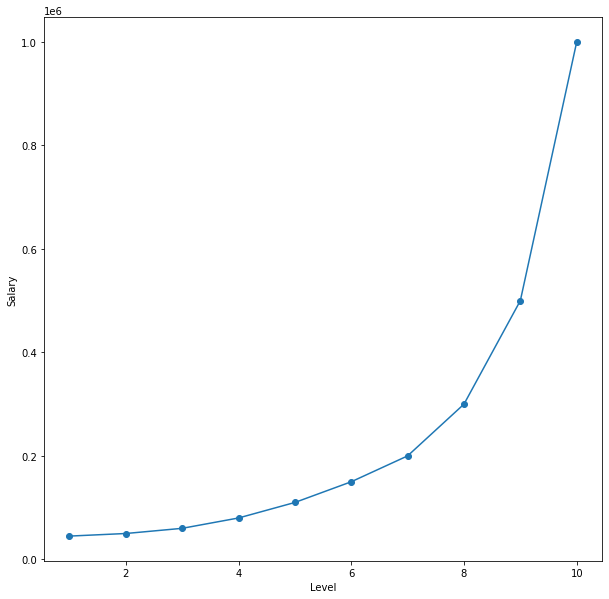

In [43]:
plt.figure(figsize=(10,10))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(df['Level'], df['Salary'])
plt.plot(df['Level'], df['Salary'])
plt.show()

In [44]:
X = df['Level'].to_numpy().reshape(-1, 1)
y = df['Salary'].to_numpy()

In [45]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [67]:
def Polynomial_regression_fucntion(x, y, degree):
    reg = LinearRegression()
    polyfit = PolynomialFeatures(degree=degree)
    x_poly = polyfit.fit_transform(x)
    reg.fit(x_poly, y)
    y_pred = reg.predict(x_poly)
    
    plt.figure(figsize=(5, 5))
    plt.xlabel('Level')
    plt.ylabel('Salary')
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'g')
    plt.show()
    return y_pred

In [81]:
def eval_func(y, y_p):
    print('RMSE:', np.sqrt(mean_squared_error(y, y_p)))
    print('MAE:', mean_absolute_error(y, y_p))
    print('R2 Score:', r2_score(y, y_p))

# 1 degree polynomial regression

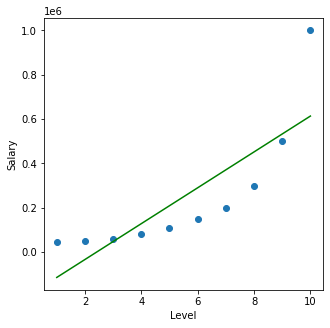

RMSE: 163388.73519272613
MAE: 128454.54545454544
R2 Score: 0.6690412331929895


In [82]:

y_pred = Polynomial_regression_fucntion(X, y,1)
eval_func(y, y_pred)

# 2 degree polynomial regression

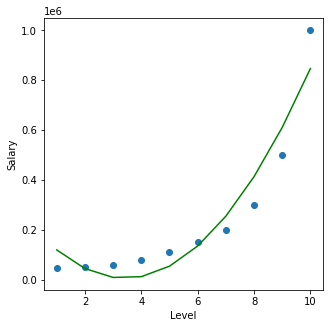

RMSE: 82212.12400451246
MAE: 70218.18181818188
R2 Score: 0.9162082221443942


In [83]:

y_pred = Polynomial_regression_fucntion(X, y,2)
eval_func(y, y_pred)

# 3 degree polynomial regression

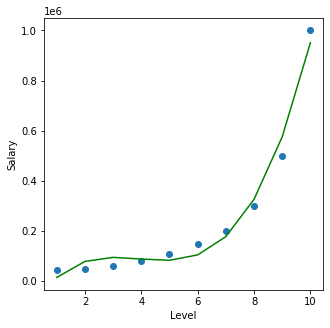

RMSE: 38931.50401232928
MAE: 34790.2097902094
R2 Score: 0.9812097727913366


In [84]:
y_pred = Polynomial_regression_fucntion(X, y,3)
eval_func(y, y_pred)

# 4 degree polynomial regression

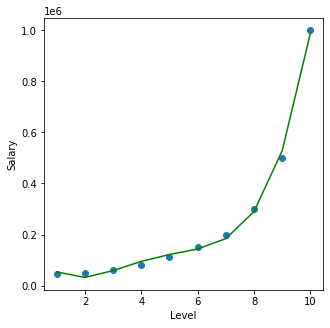

RMSE: 14503.234909627146
MAE: 12681.818181840352
R2 Score: 0.9973922891706613


In [85]:
y_pred = Polynomial_regression_fucntion(X, y,4)
eval_func(y, y_pred)

# 5 degree polynomial regression

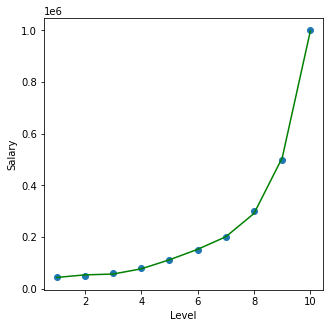

RMSE: 4047.503475264695
MAE: 3360.8391607082026
R2 Score: 0.9997969027099755


In [86]:
y_pred = Polynomial_regression_fucntion(X, y,5)
eval_func(y, y_pred)